Group 5<br><br>
Leader: Looi Chiek Shen (A170735)<br>
Spokesperson: Jackson Kek Hai Wei (A170284), Leong Khai Herng (A170605)<br>
Record keeper: Nelson Teo Chang Jun (A170860)<br><br>
Website: https://election.thestar.com.my/selangor.html

# 1. EXTRACT

## Load Library

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import regex as re
import pandas as pd
import matplotlib.pyplot as plt

## Load Webpage Content 

In [ ]:
# Load webpage content 
r = requests.get("https://election.thestar.com.my/selangor.html")

soup = bs(r.content)

## Scrape all the important attributes

In [ ]:
# scrape constituency
constituency = []
winner = []
num_vote_winner = []
reg_voters = []
majority = []
spoilt_vote = []
turnout = []
demo = []
for tag in soup.find_all('div', id = re.compile('^sN.*')):
    for name in tag.find_all('span',class_='n-name'):
      constituency.append(name.text)

# scrape winner for that consituency
for tag in soup.find_all('div', id = re.compile('^sN.*')):
    for name in tag.find_all(class_="name-candidate"):
      if name.find_all(class_="fa fa-check"):
        winner.append(name.text)

# scrape winner won votes
for tag in soup.find_all('div', id = re.compile('^sN.*')):
    for name in tag.find_all(class_="candidiate-name-one col-md-5 col-xs-12"):
      if name.find_all(class_="fa fa-check"):
        z = name.find_next_sibling(class_ = "bar-progress col-md-7 col-xs-12")
        for vote in z.find_all(class_="number-of-voters"):
          num_vote_winner.append(vote.text)

# scrape demographics 
for tag in soup.find_all('div', id = re.compile('^sN.*')):
    for name in tag.find_all(class_="voters-demographic voters-vote col-xs-12 col-md-6"):
      if name.find_all('p'):
        demo.append(name.text)

# scrape all the other attributes
for tag in soup.find_all('div', id = re.compile('^sN.*')):
    for name in tag.find_all(class_="voters-vote col-xs-12 col-md-6"):
      for p in name.find_all('p'):
        key = p.text.split(":")
        if key[0] == 'Registered voters':
          reg_voters.append(key[1])
        if key[0] == 'Voter Turnout':
          turnout.append(key[1])
        if key[0] == 'Majority':
          majority.append(key[1])
        if key[0] == 'Spoilt votes':
          spoilt_vote.append(key[1])

# convert scraped attributes into dataframe
data = {'Constituency':constituency,
        'Winner': winner ,
        'Won Vote': num_vote_winner,
        'Registered Voter':reg_voters,
        'Majority':majority,
        'Spoilt Vote':spoilt_vote,
        'Voter Turnout':turnout,
        'Demographics':demo
        }

df_before_cleaning = pd.DataFrame (data, columns = ['Constituency','Winner','Won Vote','Registered Voter','Majority','Spoilt Vote','Voter Turnout','Demographics'])
df = df_before_cleaning
df

,Constituency,Winner,Won Vote,Registered Voter,Majority,Spoilt Vote,Voter Turnout,Demographics
0,SUNGAI AIR TAWAR (P92),Rizam Ismail (BN - UMNO),"33.4% (5,437)","16,274","1,440",220,"13,605 (83.6%)",DemographicsMalay 86.11%; Chinese 10.64%; Indi...
1,SABAK (P92),Ahmad Mustain Othman (PH - PKR),"28.4% (6,981)","24,589",130,327,"20,417 (83%)",DemographicsMalay 81.02%; Chinese 12.38%; Indi...
2,SUNGAI PANJANG (P93),Mohd Imran Tamrin (BN - UMNO),"34.4% (10,530)","30,638","2,084",362,"26,408 (86.2%)",DemographicsMalay 83.44%; Chinese 14.45%; Indi...
3,SEKINCHAN (P93),Ng Suee Lim (PH - DAP),"43.4% (7,863)","18,101","2,844",201,"15,475 (85.5%)",DemographicsMalay 43.79%; Chinese 53.02%; Indi...
4,HULU BERNAM (P94),Rosni Sohar (BN - UMNO),"35.7% (8,164)","22,857",20,323,"19,243 (84.2%)",DemographicsMalay 69.97%; Chinese 15.33%; Indi...
5,KUALA KUBU BAHARU (P94),Lee Kee Hiong (PH - DAP),"48.4% (14,101)","29,133","7,134",310,"24,746 (84.9%)",DemographicsMalay 43.5%; Chinese 34.46%; India...
6,BATANG KALI (P94),Harumaini Omar (PH - PPBM),"44.0% (21,536)","49,000","8,315",492,"42,165 (86.1%)",DemographicsMalay 65.96%; Chinese 15.23%; Indi...
7,SUNGAI BURONG (P95),Mohd Shamsudin Lias (BN - UMNO),"36.4% (8,741)","24,045","2,330",255,"20,828 (86.6%)",DemographicsMalay 85.3%; Chinese 11.64%; India...
8,PERMATANG (P95),Rozana Zainal Abidin (PH - PKR),"39.8% (9,208)","23,153","1,158",288,"20,358 (87.9%)",DemographicsMalay 63.62%; Chinese 20.44%; Indi...
9,BUKIT MELAWATI (P96),Juwairiya Zulkifli (PH - PKR),"41.6% (11,050)","26,573","2,695",418,"23,141 (87.1%)",DemographicsMalay 62.01%; Chinese 15.21%; Indi...


# 2. TRANSFORM & VISUALISATION

## Constituency, Winner

In [ ]:
# Separate serial from constituency #
df["Serial"] = df.Constituency.apply(lambda x: str(x.split('(')[1].split(')')[0]))
df["Constituency"] = df.Constituency.apply(lambda x: str(x.replace(x.split('(P')[1].split(')')[0], "")))
df["Constituency"] = df.Constituency.apply(lambda x: str(x.replace(" (P)", "")))

# Title words in constituency #
df["Constituency"] = df.Constituency.apply(lambda x: str(x.title()))

# Separate party from winner #
df["Party"] = df.Winner.apply(lambda x: str(x.split('(')[1].split(')')[0]))
df["Winner"] = df.Winner.apply(lambda x: str(x.replace(x.split('(')[1].split(')')[0], "")))
df["Winner"] = df.Winner.apply(lambda x: str(x.replace(" ()", "")))

df

,Constituency,Winner,Won Vote,Registered Voter,Majority,Spoilt Vote,Voter Turnout,Demographics,Serial,Party
0,Sungai Air Tawar,Rizam Ismail,"33.4% (5,437)","16,274","1,440",220,"13,605 (83.6%)",DemographicsMalay 86.11%; Chinese 10.64%; Indi...,P92,BN - UMNO
1,Sabak,Ahmad Mustain Othman,"28.4% (6,981)","24,589",130,327,"20,417 (83%)",DemographicsMalay 81.02%; Chinese 12.38%; Indi...,P92,PH - PKR
2,Sungai Panjang,Mohd Imran Tamrin,"34.4% (10,530)","30,638","2,084",362,"26,408 (86.2%)",DemographicsMalay 83.44%; Chinese 14.45%; Indi...,P93,BN - UMNO
3,Sekinchan,Ng Suee Lim,"43.4% (7,863)","18,101","2,844",201,"15,475 (85.5%)",DemographicsMalay 43.79%; Chinese 53.02%; Indi...,P93,PH - DAP
4,Hulu Bernam,Rosni Sohar,"35.7% (8,164)","22,857",20,323,"19,243 (84.2%)",DemographicsMalay 69.97%; Chinese 15.33%; Indi...,P94,BN - UMNO
5,Kuala Kubu Baharu,Lee Kee Hiong,"48.4% (14,101)","29,133","7,134",310,"24,746 (84.9%)",DemographicsMalay 43.5%; Chinese 34.46%; India...,P94,PH - DAP
6,Batang Kali,Harumaini Omar,"44.0% (21,536)","49,000","8,315",492,"42,165 (86.1%)",DemographicsMalay 65.96%; Chinese 15.23%; Indi...,P94,PH - PPBM
7,Sungai Burong,Mohd Shamsudin Lias,"36.4% (8,741)","24,045","2,330",255,"20,828 (86.6%)",DemographicsMalay 85.3%; Chinese 11.64%; India...,P95,BN - UMNO
8,Permatang,Rozana Zainal Abidin,"39.8% (9,208)","23,153","1,158",288,"20,358 (87.9%)",DemographicsMalay 63.62%; Chinese 20.44%; Indi...,P95,PH - PKR
9,Bukit Melawati,Juwairiya Zulkifli,"41.6% (11,050)","26,573","2,695",418,"23,141 (87.1%)",DemographicsMalay 62.01%; Chinese 15.21%; Indi...,P96,PH - PKR


Rearranging Columns

In [ ]:
df = df[['Serial','Constituency','Winner','Party','Won Vote','Registered Voter','Majority','Spoilt Vote','Voter Turnout','Demographics']]

In [ ]:
df.head()

,Serial,Constituency,Winner,Party,Won Vote,Registered Voter,Majority,Spoilt Vote,Voter Turnout,Demographics
0,P92,Sungai Air Tawar,Rizam Ismail,BN - UMNO,"33.4% (5,437)","16,274","1,440",220,"13,605 (83.6%)",DemographicsMalay 86.11%; Chinese 10.64%; Indi...
1,P92,Sabak,Ahmad Mustain Othman,PH - PKR,"28.4% (6,981)","24,589",130,327,"20,417 (83%)",DemographicsMalay 81.02%; Chinese 12.38%; Indi...
2,P93,Sungai Panjang,Mohd Imran Tamrin,BN - UMNO,"34.4% (10,530)","30,638","2,084",362,"26,408 (86.2%)",DemographicsMalay 83.44%; Chinese 14.45%; Indi...
3,P93,Sekinchan,Ng Suee Lim,PH - DAP,"43.4% (7,863)","18,101","2,844",201,"15,475 (85.5%)",DemographicsMalay 43.79%; Chinese 53.02%; Indi...
4,P94,Hulu Bernam,Rosni Sohar,BN - UMNO,"35.7% (8,164)","22,857",20,323,"19,243 (84.2%)",DemographicsMalay 69.97%; Chinese 15.33%; Indi...


## Won Votes, Voter Turnout

In [ ]:
# Remove percentage value in won vote #
df["Won Vote"] = df["Won Vote"].str.split('(').str[1].str.split(')').str[0]
# Remove comma in won vote #
df["Won Vote"] = df["Won Vote"].str.replace(",", "")
# Change data type in won vote #
df["Won Vote"] = df["Won Vote"].astype(int)

# Cleaning Voters Turnout Column
voters_turnout = []
df["Voter Turnout"]
for vt in df["Voter Turnout"]:
  vt = str(vt)
  temp2 = re.sub(',', '',vt) # remove comma in Voters Turnout
  temp2 = re.sub('\([0-9]+.*[0-9]*%\)', '',temp2) # Remove values inside parenthesis
  voters_turnout.append(temp2) # append temp2 into voters turnout list

# Replacing 0 values with mean values in Voters Turnout
df_turnout = pd.DataFrame(voters_turnout, columns=['Voter Turnout'])
df_turnout = df_turnout.astype(int)
df_turnout = df_turnout.replace(0, np.nan) # replace 0 with nan
turnout_mean = df_turnout.mean() # calculate mean
df_turnout = df_turnout.replace(np.nan, turnout_mean) # replace nan with mean
df_turnout = df_turnout.astype(int)
df = df.drop(columns=['Voter Turnout']) # Drop Demographics column from df
df = pd.concat([df, df_turnout['Voter Turnout']], axis=1) # Merge two DF together
#df['Voter Turnout'] = df_turnout['Voters Turnout'] # replace df['Voter Turnout'] with new values
df

,Serial,Constituency,Winner,Party,Won Vote,Registered Voter,Majority,Spoilt Vote,Demographics,Voter Turnout
0,P92,Sungai Air Tawar,Rizam Ismail,BN - UMNO,5437,"16,274","1,440",220,DemographicsMalay 86.11%; Chinese 10.64%; Indi...,13605
1,P92,Sabak,Ahmad Mustain Othman,PH - PKR,6981,"24,589",130,327,DemographicsMalay 81.02%; Chinese 12.38%; Indi...,20417
2,P93,Sungai Panjang,Mohd Imran Tamrin,BN - UMNO,10530,"30,638","2,084",362,DemographicsMalay 83.44%; Chinese 14.45%; Indi...,26408
3,P93,Sekinchan,Ng Suee Lim,PH - DAP,7863,"18,101","2,844",201,DemographicsMalay 43.79%; Chinese 53.02%; Indi...,15475
4,P94,Hulu Bernam,Rosni Sohar,BN - UMNO,8164,"22,857",20,323,DemographicsMalay 69.97%; Chinese 15.33%; Indi...,19243
5,P94,Kuala Kubu Baharu,Lee Kee Hiong,PH - DAP,14101,"29,133","7,134",310,DemographicsMalay 43.5%; Chinese 34.46%; India...,24746
6,P94,Batang Kali,Harumaini Omar,PH - PPBM,21536,"49,000","8,315",492,DemographicsMalay 65.96%; Chinese 15.23%; Indi...,42165
7,P95,Sungai Burong,Mohd Shamsudin Lias,BN - UMNO,8741,"24,045","2,330",255,DemographicsMalay 85.3%; Chinese 11.64%; India...,20828
8,P95,Permatang,Rozana Zainal Abidin,PH - PKR,9208,"23,153","1,158",288,DemographicsMalay 63.62%; Chinese 20.44%; Indi...,20358
9,P96,Bukit Melawati,Juwairiya Zulkifli,PH - PKR,11050,"26,573","2,695",418,DemographicsMalay 62.01%; Chinese 15.21%; Indi...,23141


In [ ]:
df = df[['Serial','Constituency','Winner','Party','Won Vote','Registered Voter','Majority','Spoilt Vote','Voter Turnout','Demographics']]

## Registered Voter, Majority, Spoilt Vote

In [ ]:
# Remove comma in registered voter 
df["Registered Voter"] = df["Registered Voter"].str.replace(",", "")
# Change data type in registered voter 
df["Registered Voter"] = df["Registered Voter"].astype(int)

df["Majority"] = df["Majority"].str.replace(",", "")
df["Majority"] = df["Majority"].astype(int)
df["Spoilt Vote"] = df["Spoilt Vote"].astype(int)
df

,Serial,Constituency,Winner,Party,Won Vote,Registered Voter,Majority,Spoilt Vote,Voter Turnout,Demographics
0,P92,Sungai Air Tawar,Rizam Ismail,BN - UMNO,5437,16274,1440,220,13605,DemographicsMalay 86.11%; Chinese 10.64%; Indi...
1,P92,Sabak,Ahmad Mustain Othman,PH - PKR,6981,24589,130,327,20417,DemographicsMalay 81.02%; Chinese 12.38%; Indi...
2,P93,Sungai Panjang,Mohd Imran Tamrin,BN - UMNO,10530,30638,2084,362,26408,DemographicsMalay 83.44%; Chinese 14.45%; Indi...
3,P93,Sekinchan,Ng Suee Lim,PH - DAP,7863,18101,2844,201,15475,DemographicsMalay 43.79%; Chinese 53.02%; Indi...
4,P94,Hulu Bernam,Rosni Sohar,BN - UMNO,8164,22857,20,323,19243,DemographicsMalay 69.97%; Chinese 15.33%; Indi...
5,P94,Kuala Kubu Baharu,Lee Kee Hiong,PH - DAP,14101,29133,7134,310,24746,DemographicsMalay 43.5%; Chinese 34.46%; India...
6,P94,Batang Kali,Harumaini Omar,PH - PPBM,21536,49000,8315,492,42165,DemographicsMalay 65.96%; Chinese 15.23%; Indi...
7,P95,Sungai Burong,Mohd Shamsudin Lias,BN - UMNO,8741,24045,2330,255,20828,DemographicsMalay 85.3%; Chinese 11.64%; India...
8,P95,Permatang,Rozana Zainal Abidin,PH - PKR,9208,23153,1158,288,20358,DemographicsMalay 63.62%; Chinese 20.44%; Indi...
9,P96,Bukit Melawati,Juwairiya Zulkifli,PH - PKR,11050,26573,2695,418,23141,DemographicsMalay 62.01%; Chinese 15.21%; Indi...


## Demographics (New Version)

### Before Merging and Cleaning Demographics



In [ ]:
# Cleaning Demographics Field
votersdemo = []
for vd in df["Demographics"]:
  #print(temp)
  vd = re.sub('([A-Za-z/])', '',vd) # remove words in the data
  vd = re.sub('%', '',vd) # remove percentage
  vd = re.sub(' ', '',vd) # remove whitespaces
  vd = re.sub('(\(.\))', '',vd)
  ii = vd.split(';') # split ;
  votersdemo.append(ii) # Appending values into votersdemo list

df_demographics = pd.DataFrame(votersdemo, columns=['Malay (%)', 'Chinese (%)', 'Indian (%)', 'B/P Sabah (%)', 'B/P Sarawak (%)', 'Orang Asli (%)', 'Others (%)'])
df_demographics = df_demographics.astype(float)
df_demographics = df_demographics.fillna(0)
df = df.drop(columns=['Demographics']) # Drop Demographics column from df
df = pd.concat([df, df_demographics], axis=1) # Merge two DF together
df

,Serial,Constituency,Winner,Party,Won Vote,Registered Voter,Majority,Spoilt Vote,Voter Turnout,Malay (%),Chinese (%),Indian (%),B/P Sabah (%),B/P Sarawak (%),Orang Asli (%),Others (%)
0,P92,Sungai Air Tawar,Rizam Ismail,BN - UMNO,5437,16274,1440,220,13605,86.11,10.64,2.96,0.04,0.07,0.01,0.18
1,P92,Sabak,Ahmad Mustain Othman,PH - PKR,6981,24589,130,327,20417,81.02,12.38,6.26,0.05,0.07,0.01,0.20
2,P93,Sungai Panjang,Mohd Imran Tamrin,BN - UMNO,10530,30638,2084,362,26408,83.44,14.45,1.64,0.10,0.05,0.01,0.32
3,P93,Sekinchan,Ng Suee Lim,PH - DAP,7863,18101,2844,201,15475,43.79,53.02,2.65,0.13,0.06,0.01,0.35
4,P94,Hulu Bernam,Rosni Sohar,BN - UMNO,8164,22857,20,323,19243,69.97,15.33,13.57,0.04,0.06,0.58,0.44
5,P94,Kuala Kubu Baharu,Lee Kee Hiong,PH - DAP,14101,29133,7134,310,24746,43.50,34.46,18.71,0.20,0.31,2.23,0.59
6,P94,Batang Kali,Harumaini Omar,PH - PPBM,21536,49000,8315,492,42165,65.96,15.23,15.98,0.20,0.12,1.79,0.72
7,P95,Sungai Burong,Mohd Shamsudin Lias,BN - UMNO,8741,24045,2330,255,20828,85.30,11.64,2.57,0.05,0.04,0.39,0.00
8,P95,Permatang,Rozana Zainal Abidin,PH - PKR,9208,23153,1158,288,20358,63.62,20.44,15.55,0.04,0.03,0.32,0.00
9,P96,Bukit Melawati,Juwairiya Zulkifli,PH - PKR,11050,26573,2695,418,23141,62.01,15.21,22.08,0.09,0.09,0.02,0.50


Text(0, 0.5, 'Percentage of voters (%)')

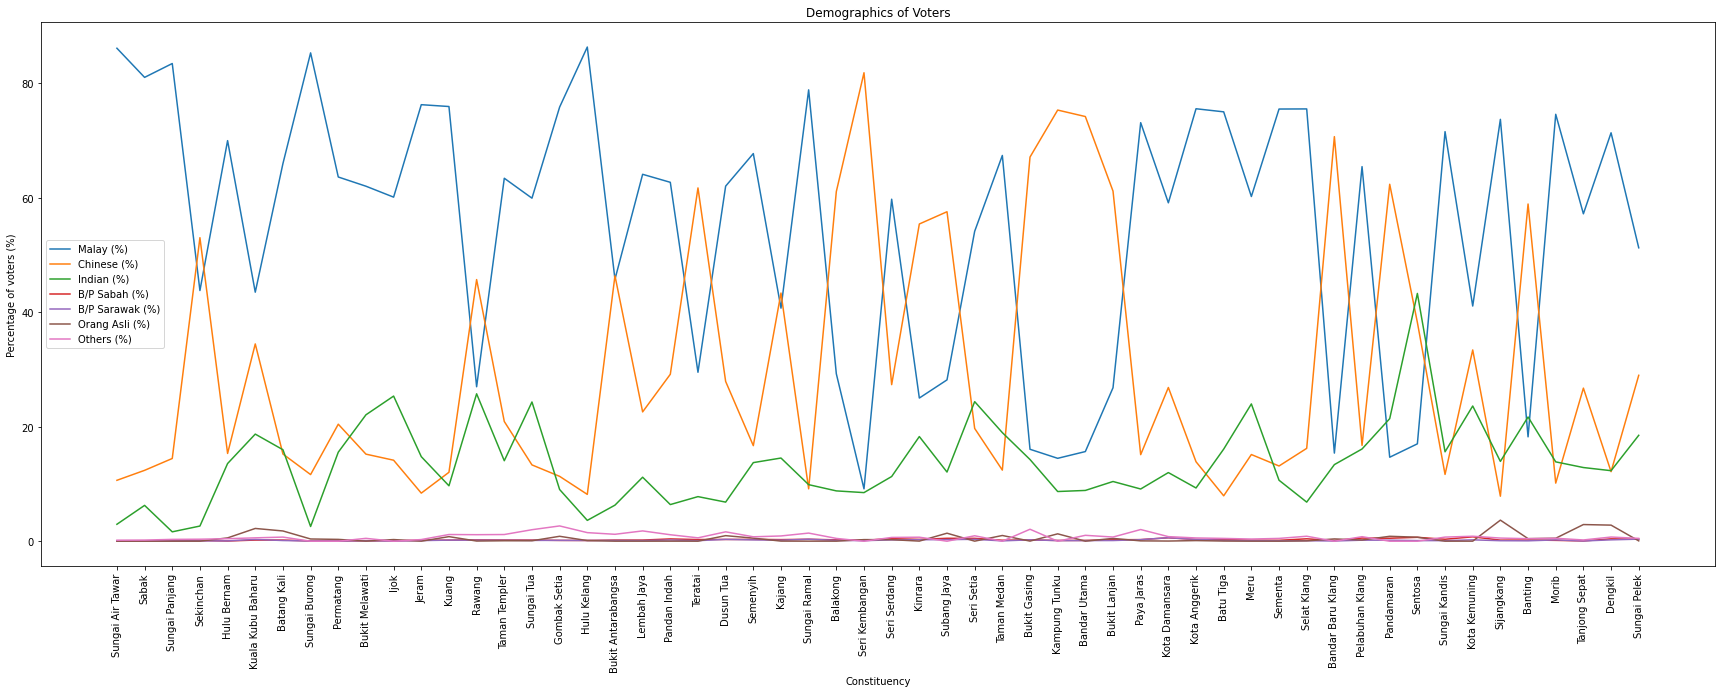

In [ ]:
# Plotting graph on demographics based on ethnicity
df.plot(y=["Malay (%)", "Chinese (%)", "Indian (%)", 'B/P Sabah (%)', 'B/P Sarawak (%)', 'Orang Asli (%)', 'Others (%)'], figsize = (30, 10))
plt.xticks(df.index, df['Constituency'], rotation=90)
plt.title('Demographics of Voters')
plt.xlabel("Constituency")
plt.ylabel('Percentage of voters (%)')

### After Cleaning and Merging

In [ ]:
# Cleaning and merging data
df_demographics = df_demographics.drop(columns=['B/P Sabah (%)', 'B/P Sarawak (%)', 'Orang Asli (%)', 'Others (%)']) # Drop other ethnicity
demographicsOther = 100-(df_demographics['Malay (%)'] + df_demographics['Chinese (%)'] + df_demographics['Indian (%)']) # Merge multiple ethnicities into 1
df_demographics['Others (%)'] = demographicsOther # add other ethnicity into df_demographics
df = df.drop(columns=['B/P Sabah (%)', 'B/P Sarawak (%)', 'Orang Asli (%)', 'Others (%)']) # Drop Demographics column from df
df = pd.concat([df, df_demographics['Others (%)']], axis=1) # Merge two DF together
df

,Serial,Constituency,Winner,Party,Won Vote,Registered Voter,Majority,Spoilt Vote,Voter Turnout,Malay (%),Chinese (%),Indian (%),Others (%)
0,P92,Sungai Air Tawar,Rizam Ismail,BN - UMNO,5437,16274,1440,220,13605,86.11,10.64,2.96,0.29
1,P92,Sabak,Ahmad Mustain Othman,PH - PKR,6981,24589,130,327,20417,81.02,12.38,6.26,0.34
2,P93,Sungai Panjang,Mohd Imran Tamrin,BN - UMNO,10530,30638,2084,362,26408,83.44,14.45,1.64,0.47
3,P93,Sekinchan,Ng Suee Lim,PH - DAP,7863,18101,2844,201,15475,43.79,53.02,2.65,0.54
4,P94,Hulu Bernam,Rosni Sohar,BN - UMNO,8164,22857,20,323,19243,69.97,15.33,13.57,1.13
5,P94,Kuala Kubu Baharu,Lee Kee Hiong,PH - DAP,14101,29133,7134,310,24746,43.50,34.46,18.71,3.33
6,P94,Batang Kali,Harumaini Omar,PH - PPBM,21536,49000,8315,492,42165,65.96,15.23,15.98,2.83
7,P95,Sungai Burong,Mohd Shamsudin Lias,BN - UMNO,8741,24045,2330,255,20828,85.30,11.64,2.57,0.49
8,P95,Permatang,Rozana Zainal Abidin,PH - PKR,9208,23153,1158,288,20358,63.62,20.44,15.55,0.39
9,P96,Bukit Melawati,Juwairiya Zulkifli,PH - PKR,11050,26573,2695,418,23141,62.01,15.21,22.08,0.70


Text(0, 0.5, 'Percentage of voters (%)')

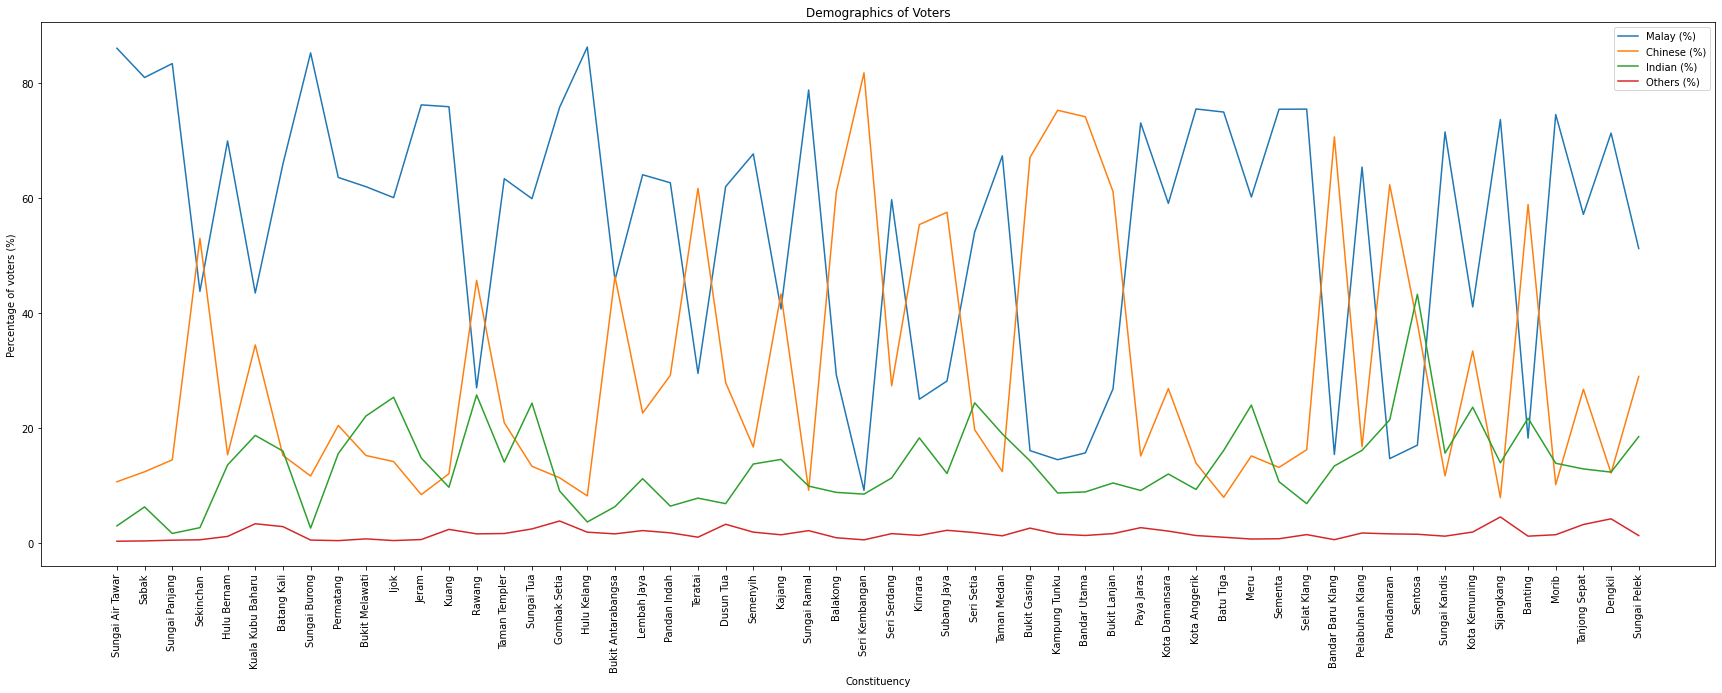

In [ ]:
# Plotting graph on demographics based on ethnicity
df.plot(y=["Malay (%)", "Chinese (%)", "Indian (%)", "Others (%)"], figsize = (30, 10))
plt.xticks(df.index, df['Constituency'], rotation=90)
plt.title('Demographics of Voters')
plt.xlabel("Constituency")
plt.ylabel('Percentage of voters (%)')

# 3. VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

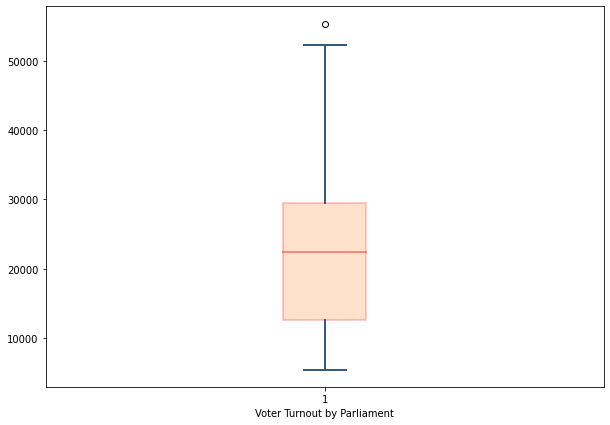

In [ ]:
# Create a figure instance

fig2 = plt.figure(figsize=(10, 7))
# Create an axes instance
ax = fig2.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df['Won Vote'], patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#FF000099', linewidth=2, alpha=0.5)
    # change fill color
    box.set( facecolor = '#FF6D0099' ,alpha=0.2)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#355c7d', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#355c7d', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#FF000099', linewidth=2, alpha=0.4)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#2a363b', alpha=1)

ax.set_xlabel('Voter Turnout by Parliament')

fig2.savefig('boxplot.png', bbox_inches='tight')

plt.show()

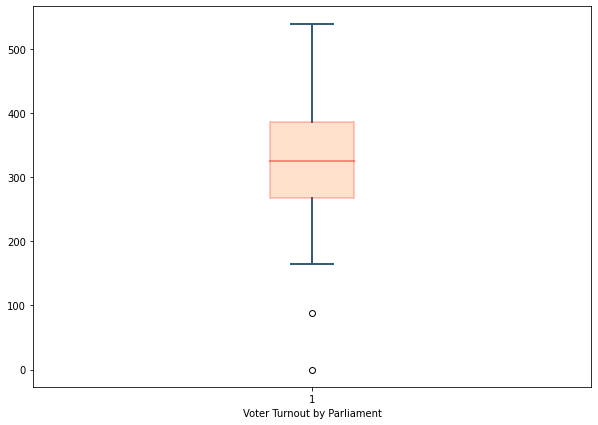

In [ ]:
# Create a figure instance

fig2 = plt.figure(figsize=(10, 7))
# Create an axes instance
ax = fig2.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df['Spoilt Vote'], patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#FF000099', linewidth=2, alpha=0.5)
    # change fill color
    box.set( facecolor = '#FF6D0099' ,alpha=0.2)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#355c7d', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#355c7d', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#FF000099', linewidth=2, alpha=0.4)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#2a363b', alpha=1)

ax.set_xlabel('Voter Turnout by Parliament')

fig2.savefig('boxplot.png', bbox_inches='tight')

plt.show()

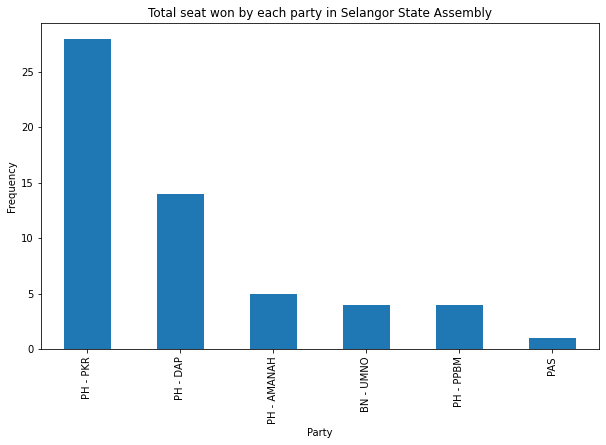

In [ ]:
# Visualize wining seat number by party before cleaning process

df['Party'].value_counts().plot(kind='bar', figsize = (10, 6))
plt.title("Total seat won by each party in Selangor State Assembly")
plt.xlabel("Party")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# Cleaning the data to PH, BN and PAS

def cleanparty(text):
    text = re.sub('PH - PKR', 'PH', text)
    text = re.sub('PH - DAP', 'PH', text)
    text = re.sub('PH - AMANAH', 'PH', text)
    text = re.sub('PH - PPBM', 'PH', text)
    text = re.sub('BN - UMNO', 'BN', text)
    return text

df["Party"] = df['Party'].apply(lambda x: cleanparty(x))

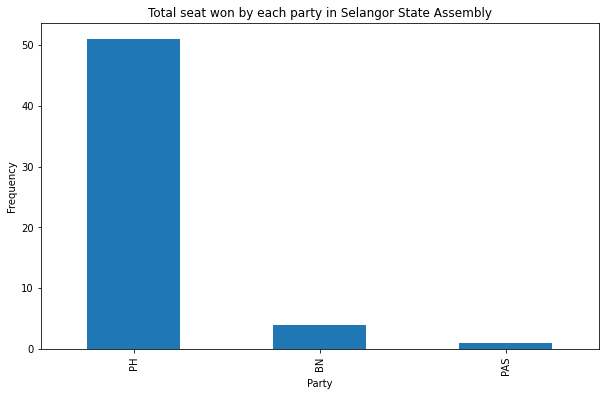

In [ ]:
# Visualize wining seat number by party after cleaning process
import matplotlib.pyplot as plt
df['Party'].value_counts().plot(kind='bar', figsize = (10, 6))
plt.title("Total seat won by each party in Selangor State Assembly")
plt.xlabel("Party")
plt.ylabel("Frequency")

plt.show()

In [ ]:
df.head()

,Serial,Constituency,Winner,Party,Won Vote,Registered Voter,Majority,Spoilt Vote,Voter Turnout,Malay (%),Chinese (%),Indian (%),Others (%)
0,P92,Sungai Air Tawar,Rizam Ismail,BN,5437,16274,1440,220,13605,86.11,10.64,2.96,0.29
1,P92,Sabak,Ahmad Mustain Othman,PH,6981,24589,130,327,20417,81.02,12.38,6.26,0.34
2,P93,Sungai Panjang,Mohd Imran Tamrin,BN,10530,30638,2084,362,26408,83.44,14.45,1.64,0.47
3,P93,Sekinchan,Ng Suee Lim,PH,7863,18101,2844,201,15475,43.79,53.02,2.65,0.54
4,P94,Hulu Bernam,Rosni Sohar,BN,8164,22857,20,323,19243,69.97,15.33,13.57,1.13


In [ ]:
TotalRegisteredVoter = df['Registered Voter'].sum()
TotalVoterTurnout = df['Voter Turnout'].sum()
Totalnonvoting = TotalRegisteredVoter - TotalVoterTurnout
df_total = pd.DataFrame([[TotalRegisteredVoter, TotalVoterTurnout, Totalnonvoting]], columns=['Total Registered Voters', 'Total Voter Turnout', 'Did Not Vote'])
df_total

,Total Registered Voters,Total Voter Turnout,Did Not Vote
0,2415074,2029960,385114


([<matplotlib.axis.XTick at 0x7f8bc0e3c668>], [Text(0, 0, 'S')])

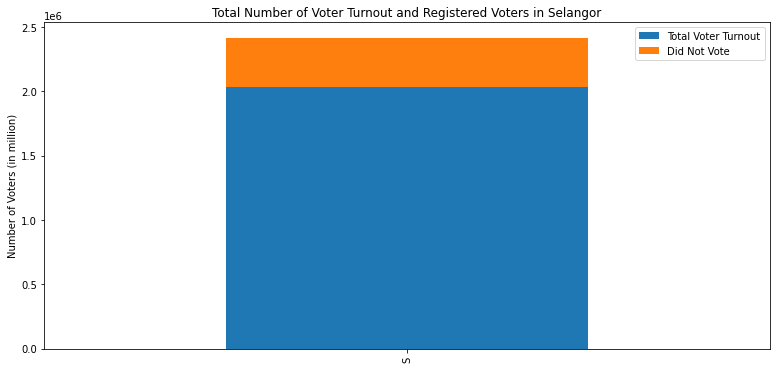

In [ ]:
df_total[['Total Voter Turnout', 'Did Not Vote']].plot(kind='bar', figsize = (13, 6), stacked='true')
plt.title('Total Number of Voter Turnout and Registered Voters in Selangor')
plt.ylabel('Number of Voters (in million)')
plt.xticks(df_total.index, 'Selangor', rotation=90)

In [ ]:
df_info = df[['Voter Turnout','Registered Voter']]
df_info['Did not vote'] = df_info['Registered Voter'] - df_info['Voter Turnout'] 
df_info


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Voter Turnout,Registered Voter,Did not vote
0,13605,16274,2669
1,20417,24589,4172
2,26408,30638,4230
3,15475,18101,2626
4,19243,22857,3614
5,24746,29133,4387
6,42165,49000,6835
7,20828,24045,3217
8,20358,23153,2795
9,23141,26573,3432


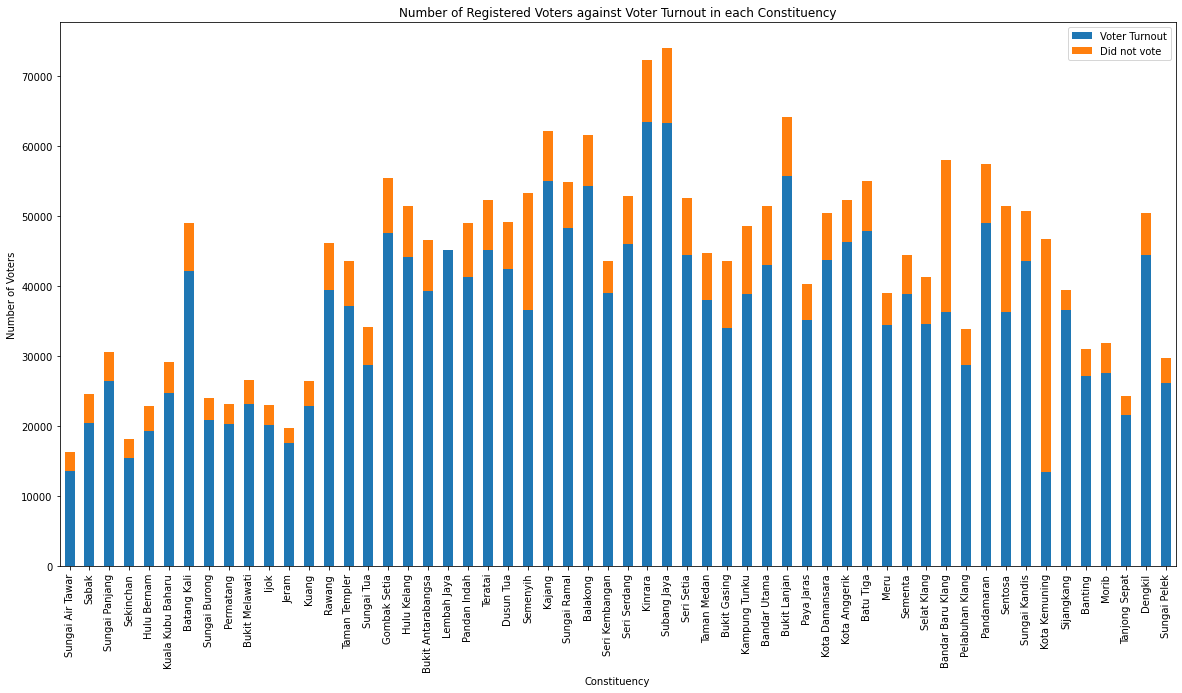

In [ ]:
# Visualization of Voter Turnout against Registered Voter

df_info[['Voter Turnout','Did not vote']].plot(kind='bar', figsize = (20, 10), stacked='true')
plt.xticks(df.index, df['Constituency'], rotation=90)
plt.title('Number of Registered Voters against Voter Turnout in each Constituency')
plt.xlabel("Constituency")
plt.ylabel('Number of Voters')
plt.show()


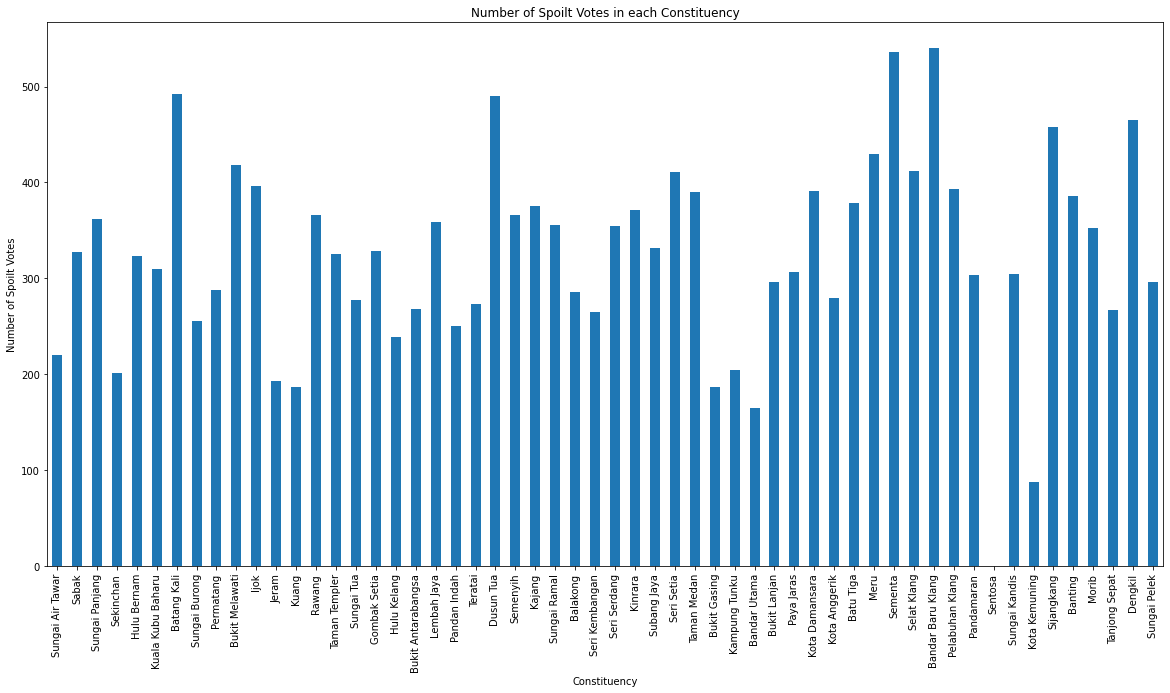

In [ ]:
# Visualization of spoilt vote

df["Spoilt Vote"] = df["Spoilt Vote"].astype(int)
df['Spoilt Vote'].plot(kind='bar', figsize = (20, 10))
plt.xticks(df.index, df['Constituency'], rotation=90)
plt.title('Number of Spoilt Votes in each Constituency')
plt.xlabel("Constituency")
plt.ylabel('Number of Spoilt Votes')
plt.show()

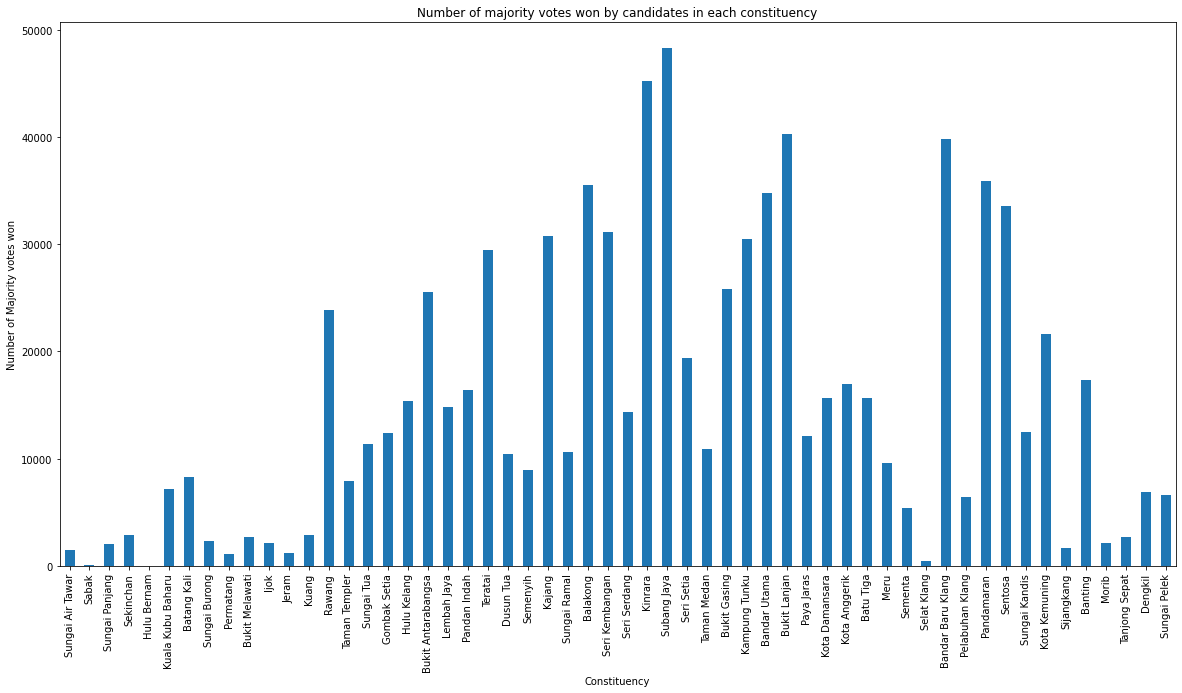

In [ ]:
# Visualization of Majority votes won by candidates in each constituency

df["Majority"] = df["Majority"].astype(int)
df['Majority'].plot(kind='bar', figsize = (20, 10))
plt.xticks(df.index, df['Constituency'], rotation=90)
plt.title('Number of majority votes won by candidates in each constituency')
plt.xlabel("Constituency")
plt.ylabel('Number of Majority votes won')
plt.show()
#df.plot(y=["Won Vote", "Majority"], figsize = (20, 10))

In [ ]:
# Calculate the mean value for each ethnicity
AvgM = df["Malay (%)"].mean()
AvgC = df["Chinese (%)"].mean()
AvgI = df["Indian (%)"].mean()
AvgO = df["Others (%)"].mean()
raw_data = {'Demographics': ["Malay", "Chinese", "Indian", "Others"],
'Percentage': [AvgM,AvgC,AvgI,AvgO]}
df_averagedemographics = pd.DataFrame(raw_data, columns=['Demographics','Percentage'])
pd.options.display.float_format = "{:,.2f}".format

Text(0, 0.5, 'Percentage of voters')

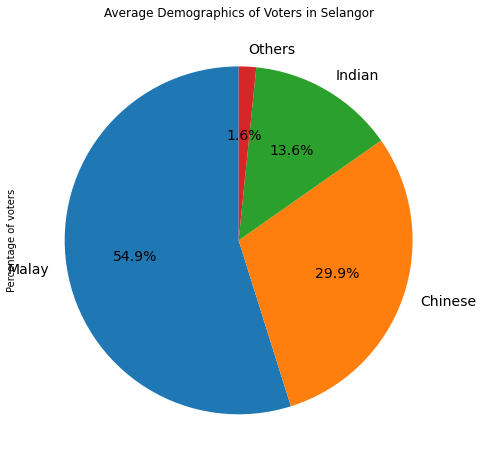

In [ ]:
# Plot a pie chart for the average demographics of voters in Selangor

df_averagedemographics.plot(kind='pie', y = 'Percentage', autopct='%1.1f%%', startangle=90, shadow=False, labels=df_averagedemographics['Demographics'], legend = False, fontsize=14, figsize = (16, 8))
plt.title('Average Demographics of Voters in Selangor')
plt.ylabel('Percentage of voters')


# 4. LOAD

In [ ]:
df.to_csv(r'ETL_Selangor_State_Election.csv')